## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import skimage.filters

## Load image

In [2]:
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/img/'
file_name = 'fantasy.jpg'
file_path = file_directory + file_name

In [3]:
def plot_img(img, show = True):
    
    fig = plt.figure(figsize = (12,12))
    plt.imshow(img, cmap = 'gray', interpolation = 'none')
    
    if show:
        plt.show()

In [4]:
img = cv2.imread(file_path)
img = np.mean(img[:,:], axis = 2).astype(np.uint8)



plot_img(img)

TypeError: 'NoneType' object is not subscriptable

## Process

In [5]:
def auto_canny(img, low_sigma = 0.33, high_sigma = .33):
    
    
    median = np.median(img)
    
    min_val = int(max(0, (1.0 - low_sigma) * median))
    max_val = int(min(255, (1.0 + high_sigma) * median))
    
    print(min_val, max_val)
    
    proc_img = cv2.Canny(img, min_val, max_val)
    
    return proc_img

In [6]:
proc_img = np.copy(img)
for i in range(5):
    # Down sample
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)
    
    plot_img(proc_img, show = True)
    

RuntimeError: input and output rank must be > 0

In [7]:
debug = True

# Copy
proc_img = np.copy(img)

'''
# Blur
blur_kernel = (3,3)
proc_img = cv2.GaussianBlur(proc_img, blur_kernel, 0)

if debug:
    print('gauss blur', blur_kernel)
    plot_img(proc_img, show = True)
''' 

    
# Otsu
val = skimage.filters.threshold_otsu(img)
otsu_img = img > val
proc_img[otsu_img == 0] = 0
proc_img[otsu_img > 0] = 1

if debug:
    print('otsu')
    plot_img(proc_img, show = True)
    
    
# Erode dilate
kernel = (125,125)
proc_img = cv2.morphologyEx(proc_img, cv2.MORPH_CLOSE, kernel)

if debug:
    print('closing')
    plot_img(proc_img, show = True)





# Down sample
num_downsamples = 4
for i in range(num_downsamples):
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)
    
    if debug:
        print('downsample', i)
        plot_img(proc_img, show = True)




# Sobel y
proc_img = cv2.Sobel(proc_img, cv2.CV_64F, 0, 1, ksize = -1)

if debug:
    print('sobel y')
    plot_img(proc_img)

    
    
# Invert
proc_img = np.max(proc_img) - proc_img


if debug:
    print('invert')
    plot_img(proc_img)
    

    
# Digitize
img_max = np.max(proc_img)
img_min = np.min(proc_img)
num_levels = 3
bins = [1.*i*(img_max-img_min)/num_levels for i in range(0, num_levels)]

#bins = [i*1./num_levels for i in range(num_levels+1)]
proc_img = np.digitize(proc_img, bins)

if debug:
    print('digitize')
    plot_img(proc_img, show = True)

    

# Binarize
proc_img[proc_img < np.max(proc_img)] = 0

if debug:
    print('binarize')
    plot_img(proc_img, show = True)


    
# Connected components
proc_img, unique_values = scipy.ndimage.label(proc_img, structure = np.ones((3,3)))

unique_values = list(range(unique_values))

print('unique values', unique_values)


if debug:
    for unique_value in unique_values:
                
        # Get slope and length of each connect component
        bright_pixels = np.where(proc_img == unique_value)
        points = np.hstack((bright_pixels[0].reshape(-1,1), bright_pixels[1].reshape(-1,1)))
        
        dx = np.max(points[:,0]) - np.min(points[:,0])
        dy = np.max(points[:,1]) - np.min(points[:,1])
        
        
        if np.arctan2(dy, dx) < np.pi/6.:
            
            plot_img((proc_img == unique_value))
            
        
        
            


# Look at
plot_img(proc_img, show = False)
plt.savefig('asdf.png', dpi = 300)
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

## Spine detection

In [11]:
def plot_img(img, show = True):
    
    fig = plt.figure(figsize = (12,12))
    plt.imshow(img, cmap = 'gray', interpolation = 'none')
    
    if show:
        plt.show()
        
def plot_hist(img, show = True):
    plt.hist(img.flatten(), bins = 100)
    
    if show:
        plt.show()

## Insight 0

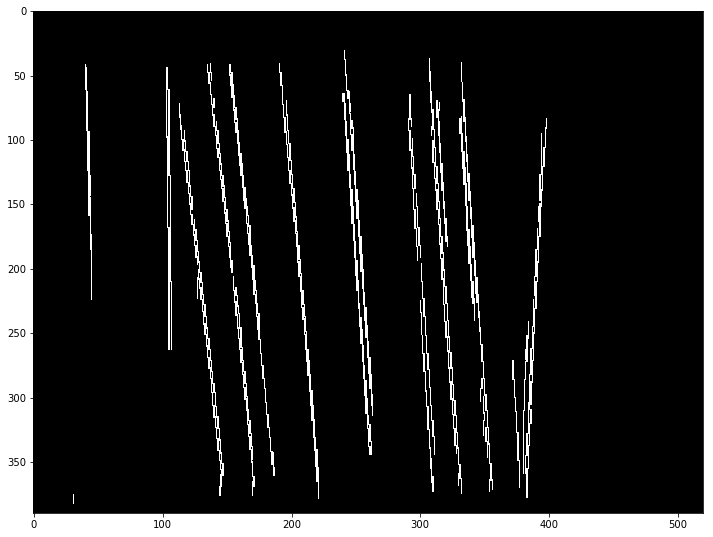

In [70]:
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/insight_0/'
file_name = 'insight_0.jpg'
file_path = file_directory + file_name

img = cv2.imread(file_path)
img = np.mean(img[:,:], axis = 2).astype(np.uint8)


plot_img(img)

debug = False
debug_hist = False

# Copy
proc_img = np.copy(img)


# Blur
#blur_kernel = (3,3)
#proc_img = cv2.GaussianBlur(proc_img, blur_kernel, 0)

#if debug:
    #print('gauss blur', blur_kernel)
    #plot_img(proc_img, show = True)


# Down sample
num_downsamples = 3
for i in range(num_downsamples):
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)
    
    if debug:
        print('downsample', i)
        plot_img(proc_img, show = True)
        
        
    
## Sobel x
#proc_img = cv2.Sobel(proc_img, cv2.CV_64F, 1, 0, ksize = -1)**2.
proc_img = cv2.Sobel(proc_img, cv2.CV_8UC1, 1, 0, ksize = -1)**2.


if debug:
    print('sobel x')
    plot_img(proc_img)
if debug_hist:
    plot_hist(proc_img)
    
    
# Standardize
proc_img = (proc_img - np.min(proc_img))/np.max(proc_img)

if debug:
    print('standardize')
    plot_img(proc_img)
    

# Digitize
img_max = np.max(proc_img)
img_min = np.min(proc_img)
num_levels = 4
bins = [1.*i*(img_max-img_min)/num_levels for i in range(0, num_levels)]
proc_img = np.digitize(proc_img, bins)

if debug:
    print('digitize')
    plot_img(proc_img, show = True)

 

# Binarize
proc_img[proc_img == np.min(proc_img)] = 0
proc_img[proc_img != 0] = 1


if debug:
    print('binarize')
    plot_img(proc_img, show = True)

    
# Horizontal erosion and subtraction
for i in range(1):
    structure_length = 5*(i+1)
    #structure = np.ones((3,3))*structure_length
    structure = np.ones((3,3))*structure_length
    old_proc_img = np.copy(proc_img)
    proc_img = proc_img - scipy.ndimage.morphology.binary_erosion(proc_img, structure, 1)
    
    if debug:
        print('erode/subtract')
        plot_img(proc_img, show = True)
        
        
# Vertical open close
for i in range(1):
    structure_length = 200
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_erosion(proc_img, structure, 3)
    
    if debug:
        print('morpho erode')
        plot_img(proc_img, show = True)
        
# Vertical open
for i in range(1):
    structure_length = 3
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_dilation(proc_img, structure, 3)
    
    if debug:
        print('morpho dilate')
        plot_img(proc_img, show = True)
        


    

# Connected components
proc_img, unique_values = scipy.ndimage.label(proc_img, structure = np.ones((3,3)))

unique_values = list(range(unique_values))





if debug:
    for unique_value in unique_values:
                
        # Get slope and length of each connect component
        bright_pixels = np.where(proc_img == unique_value)
        points = np.hstack((bright_pixels[0].reshape(-1,1), bright_pixels[1].reshape(-1,1)))
        
        dx = np.max(points[:,0]) - np.min(points[:,0])
        dy = np.max(points[:,1]) - np.min(points[:,1])
        
        
# Remove clusters too small
drop_values = []
threshold = proc_img.shape[0]*.25
for unique_value in unique_values:
    bright_pixels = np.where(proc_img == unique_value)
    ptp = np.ptp(bright_pixels[0])
    

    
    if(ptp < threshold):
        drop_values.append(unique_value)
        
for drop_value in drop_values:
    proc_img[proc_img == drop_value] = 0
    
if debug:
    print('Remove clusters that are too small')
    plot_img(proc_img, show = True)
    
    
# Re-binarize
proc_img[proc_img != 0] = 1

if debug:
    print('Binarize')
    plot_img(proc_img, show = True)
    
    
'''
# Morph Dilation
# Vertical open
for i in range(1):
    structure_length = 100
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_dilation(proc_img, structure, 1)
    
    if debug:
        print('morpho dilate')
        plot_img(proc_img, show = True)

    
'''


    

plot_img(proc_img, show = False)
plt.savefig('./proc_img.png', dpi = 300)
plt.show()

## Insight 1

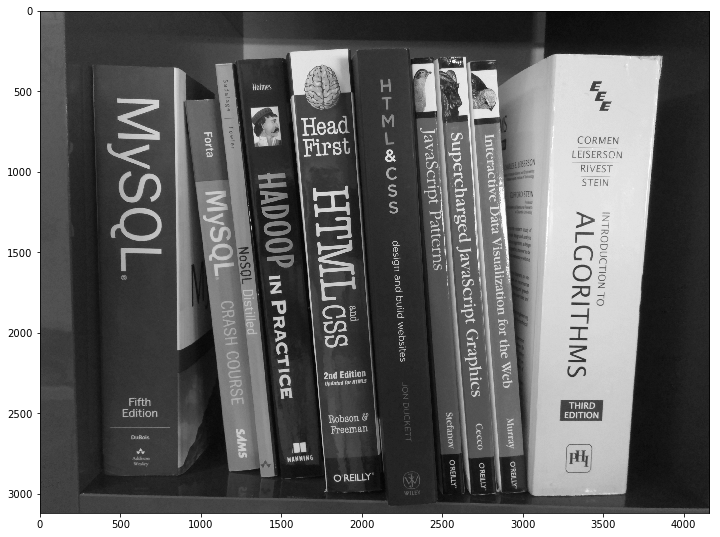

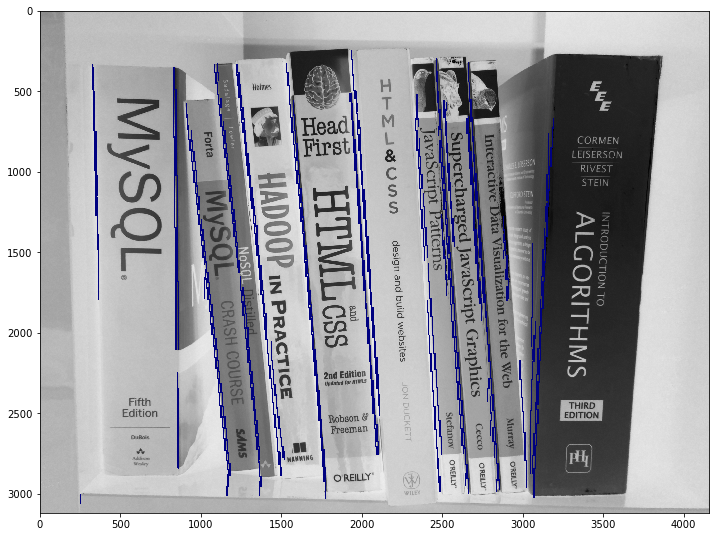

In [81]:
file_directory = '/home/prestonh/Desktop/Programming/datasci/insight/projects/shelfy/shelfy/data/shelves/insight_0/'
file_name = 'insight_0.jpg'
file_path = file_directory + file_name


img = cv2.imread(file_path)
img = np.mean(img[:,:], axis = 2).astype(np.uint8)


plot_img(img)

debug = False
debug_hist = False

# Copy
proc_img = np.copy(img)


# Blur
#blur_kernel = (3,3)
#proc_img = cv2.GaussianBlur(proc_img, blur_kernel, 0)

#if debug:
    #print('gauss blur', blur_kernel)
    #plot_img(proc_img, show = True)


# Down sample
num_downsamples = 3
for i in range(num_downsamples):
    proc_img = scipy.ndimage.interpolation.zoom(proc_img,.5)
    
    if debug:
        print('downsample', i)
        plot_img(proc_img, show = True)
        
        
    
## Sobel x
#proc_img = cv2.Sobel(proc_img, cv2.CV_64F, 1, 0, ksize = -1)**2.
proc_img = cv2.Sobel(proc_img, cv2.CV_8UC1, 1, 0, ksize = -1)**2.


if debug:
    print('sobel x')
    plot_img(proc_img)
if debug_hist:
    plot_hist(proc_img)
    
    
# Standardize
proc_img = (proc_img - np.min(proc_img))/np.max(proc_img)

if debug:
    print('standardize')
    plot_img(proc_img)
    

# Digitize
img_max = np.max(proc_img)
img_min = np.min(proc_img)
num_levels = 4
bins = [1.*i*(img_max-img_min)/num_levels for i in range(0, num_levels)]
proc_img = np.digitize(proc_img, bins)

if debug:
    print('digitize')
    plot_img(proc_img, show = True)

 

# Binarize
proc_img[proc_img == np.min(proc_img)] = 0
proc_img[proc_img != 0] = 1


if debug:
    print('binarize')
    plot_img(proc_img, show = True)

    
# Horizontal erosion and subtraction
for i in range(1):
    structure_length = 5*(i+1)
    #structure = np.ones((3,3))*structure_length
    structure = np.ones((3,3))*structure_length
    old_proc_img = np.copy(proc_img)
    proc_img = proc_img - scipy.ndimage.morphology.binary_erosion(proc_img, structure, 1)
    
    if debug:
        print('erode/subtract')
        plot_img(proc_img, show = True)
        
        
# Vertical open close
for i in range(1):
    structure_length = 200
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_erosion(proc_img, structure, 3)
    
    if debug:
        print('morpho erode')
        plot_img(proc_img, show = True)
        
# Vertical open
for i in range(1):
    structure_length = 3
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_dilation(proc_img, structure, 3)
    
    if debug:
        print('morpho dilate')
        plot_img(proc_img, show = True)
        


    

# Connected components
proc_img, unique_values = scipy.ndimage.label(proc_img, structure = np.ones((3,3)))

unique_values = list(range(unique_values))





if debug:
    for unique_value in unique_values:
                
        # Get slope and length of each connect component
        bright_pixels = np.where(proc_img == unique_value)
        points = np.hstack((bright_pixels[0].reshape(-1,1), bright_pixels[1].reshape(-1,1)))
        
        dx = np.max(points[:,0]) - np.min(points[:,0])
        dy = np.max(points[:,1]) - np.min(points[:,1])
        
        
# Remove clusters too small
drop_values = []
threshold = proc_img.shape[0]*.15
for unique_value in unique_values:
    bright_pixels = np.where(proc_img == unique_value)
    ptp = np.ptp(bright_pixels[0])
    

    
    if(ptp < threshold):
        drop_values.append(unique_value)
        
for drop_value in drop_values:
    proc_img[proc_img == drop_value] = 0
    
if debug:
    print('Remove clusters that are too small')
    plot_img(proc_img, show = True)
    
    
# Re-binarize
proc_img[proc_img != 0] = 1

if debug:
    print('Binarize')
    plot_img(proc_img, show = True)
    
    
'''
# Morph Dilation
# Vertical open
for i in range(1):
    structure_length = 100
    #structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    structure = np.array([[0,1,0],[0,1,0],[0,1,0]])*structure_length
    proc_img = scipy.ndimage.morphology.binary_dilation(proc_img, structure, 1)
    
    if debug:
        print('morpho dilate')
        plot_img(proc_img, show = True)

    
'''

# Up sample
proc_img = proc_img.repeat(8, axis = 0).repeat(8, axis = 1)




# Plot final image
new_img = np.empty((img.shape[0], img.shape[1], 3))
new_img[:,:,0] = img
new_img[:,:,1] = img
new_img[:,:,2] = img

new_img[proc_img != 0,:] = [0,255,128]

plot_img(new_img, show = False)
#plt.savefig('./proc_img.png', dpi = 300)
plt.show()